# Visualization Exercises
----

There are multiple ways, across multiple packages, to complete these exercises.  Some answers are given, but there are other possibilities.  

Note that much of visualization is getting the data into the form you want it for plotting.  These exercises include steps necessary to select and modify data before making plots to practice that aspect of visualization as well.

## Imports

A few imports to avoid having to do them for each exercise.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib.dates as dates

import seaborn as sns

%matplotlib inline

## Get Some Data

The first exercises use data from [Gapminder](http://www.gapminder.org). Read `gapminder_5y_tidy.csv` from https://github.com/nuitrcs/pythonworkshops/raw/master/dataanalysis/datasets/gapminder_5y_tidy.csv (or the datasets directory of the repository) into a pandas data frame called `gapminder`.  Look at the first few observations.

In [2]:
gapminder = pd.read_csv("../datasets/gapminder_5y_tidy.csv")
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## Exercise: Scatter Plot

Using the `gapminder` data, plot life expectancy (`lifeExp`) vs. GDP per capita (`gdpPercap`) for the year 2002.  Make sure to label the axes and give the plot a title.

Challenge: Redo the plot, coloring the points by continent.  Make sure to add a legend.  Hint: there are a few ways to do this.  If you get stuck, take a look at https://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html or https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib for some approaches.  Hint 2: This may be easiest using Seaborn

Challenge (not contingent on the challenge above): Redo the plot and change the gdp axes to be on a log scale.

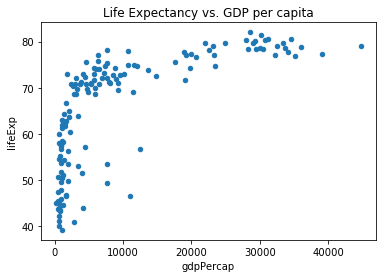

In [3]:
# pandas
gapminder[gapminder['year']==2002].plot('gdpPercap', 'lifeExp', kind="scatter", 
                                       title="Life Expectancy vs. GDP per capita");

If you want to change the x and y labels, use `matplotlib`:

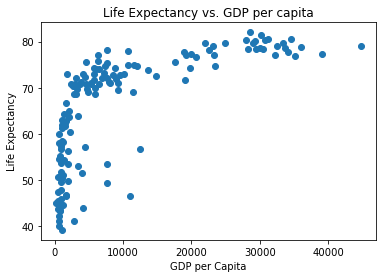

In [4]:
#matplotlib
pts = plt.scatter(gapminder.loc[gapminder['year']==2002, 'gdpPercap'],
                  gapminder.loc[gapminder['year']==2002, 'lifeExp']) 
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita");

To color by continent

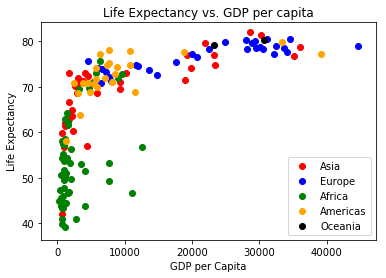

In [5]:
# matplotlib
colors = {'Asia':'red','Europe':'blue','Africa':'green','Americas':'orange','Oceania':'black'}
fig, ax = plt.subplots()
for continent, color in colors.items():
    ax.scatter(gapminder.loc[(gapminder['year']==2002) & 
                             (gapminder['continent']==continent), 'gdpPercap'],
                  gapminder.loc[(gapminder['year']==2002) & 
                             (gapminder['continent']==continent), 'lifeExp'],
                  c=color, label=continent) 
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita");
plt.legend();

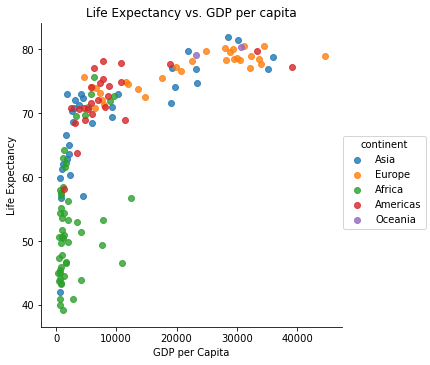

In [6]:
# seaborn
sns.lmplot(x='gdpPercap', y='lifeExp', hue='continent', 
           data=gapminder[gapminder['year']==2002],
              fit_reg=False)
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita");

Change the axis to log scale:

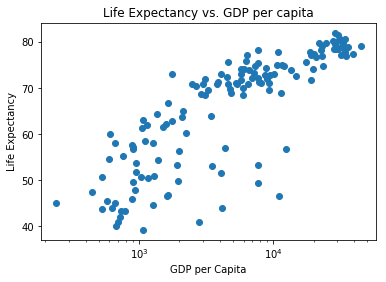

In [7]:
#matplotlib
fix, ax = plt.subplots()
ax.scatter(gapminder.loc[gapminder['year']==2002, 'gdpPercap'],
                  gapminder.loc[gapminder['year']==2002, 'lifeExp']) 
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita")
ax.set_xscale('log')

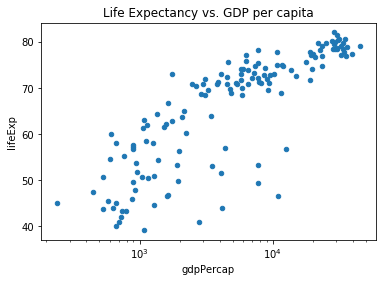

In [8]:
# pandas
gapminder[gapminder['year']==2002].plot('gdpPercap', 'lifeExp', kind="scatter", 
                                       title="Life Expectancy vs. GDP per capita",
                                       logx=True);

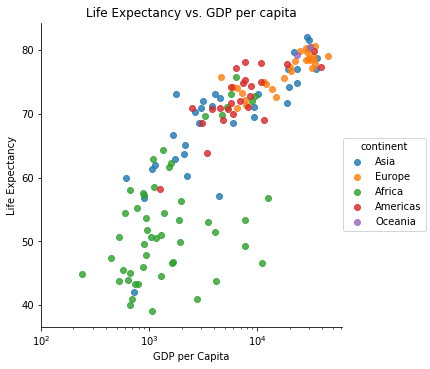

In [9]:
# seaborn
p1 = sns.lmplot(x='gdpPercap', y='lifeExp', hue='continent', 
           data=gapminder[gapminder['year']==2002],
              fit_reg=False)
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita")
p1.ax.set_xscale('log')

## Exercise: Line Plot

Using the gapminder data, plot the average life expectancy in Asia (average across countries) over time.

Hint: if you use `groupby` in calculating the mean, the groups become the index of the data frame.  You can use function `reset_index()` to make an index into a column again that you can use.

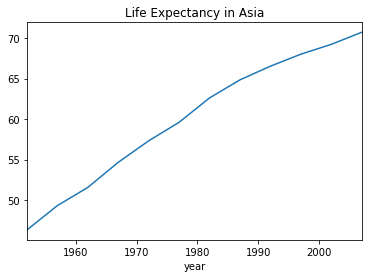

In [10]:
stats = gapminder[gapminder['continent']=='Asia'].groupby('year').mean()
stats=stats.reset_index() # to get index back as a column
stats.plot(x='year',y='lifeExp', legend=False, title="Life Expectancy in Asia");

## Exercise: Box Plot

Using the gapminder data, make a box plot of life expectancy by continent for the year 2002.  Hint: use Seaborn

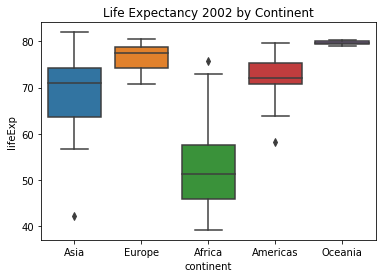

In [11]:
p1 = sns.boxplot(y='lifeExp',x='continent', data=gapminder.loc[gapminder['year']==2002])
p1.set_title("Life Expectancy 2002 by Continent");

## Exercise: Heat Map

Using Seaborn, make a heat map of a matrix with years as columns, continents as rows, and average life expectancy as the cell value.

Hint: the trick here is getting the data in the right format

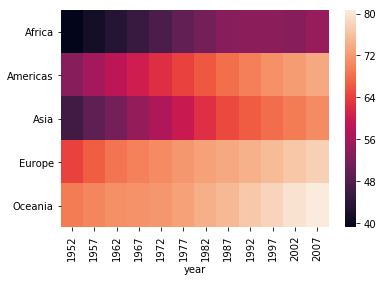

In [53]:
grouped = gapminder.groupby(['year','continent']).mean().reset_index()
d = {'year':grouped.year.unique()}
for cont in grouped.continent.unique():
    d[cont] = grouped.loc[grouped['continent']==cont,'lifeExp'].tolist()
restructured = pd.DataFrame(d)
restructured = restructured.set_index('year')
sns.heatmap(restructured.T);